In [29]:
!pip install --proxy http://proxy-us.intel.com:911 mnist

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
!pip install --proxy http://proxy-us.intel.com:911 onnxruntime

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
!pip install --proxy http://proxy-us.intel.com:911 onnx

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import mnist

In [2]:
mnist.temporary_dir = lambda : '.\\data'

In [3]:
[d for d in dir(mnist) if not d.startswith('_')]

['IdxDecodeError',
 'array',
 'datasets_url',
 'download_and_parse_mnist_file',
 'download_file',
 'functools',
 'gzip',
 'numpy',
 'operator',
 'os',
 'parse_idx',
 'struct',
 'tempfile',
 'temporary_dir',
 'test_images',
 'test_labels',
 'train_images',
 'train_labels',
 'urljoin',
 'urlretrieve']

In [4]:
test_images = mnist.test_images().tolist()

In [5]:
assert(len(test_images) == 10000)

In [6]:
import os, sys

In [7]:
os.listdir('.\\data')

['mnist', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
type(test_images[0])

list

Looks like each image is parsed into a list of lists:

In [11]:
type(test_images[0][0])

list

In [12]:
len(test_images[0])

28

In [13]:
len(test_images[0][0])

28

In [14]:
test_mat = np.array(test_images[0])

In [15]:
test_mat.shape

(28, 28)

In [16]:
test_mat.dtype

dtype('int32')

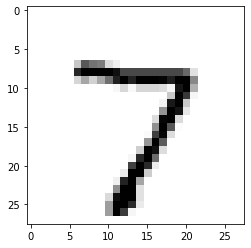

In [17]:
plt.imshow(test_mat, cmap='Greys')

In [18]:
def display_nth_image(i):
    plt.imshow(np.array(test_images[i]), cmap='Greys')

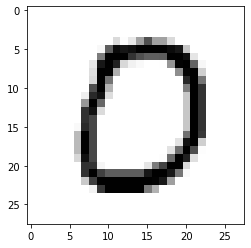

In [19]:
display_nth_image(10)

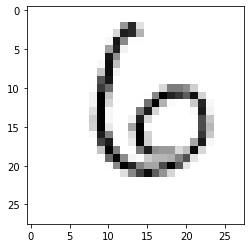

In [20]:
display_nth_image(100)

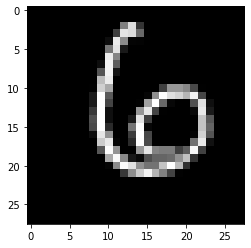

In [21]:
plt.imshow(np.array(test_images[100]), plt.get_cmap('gray'))

In [22]:
plt.imsave('img_0.png', np.array(test_images[0]), format = 'png', cmap = plt.get_cmap('gray'))

We need black digits on white background, so need a different colormap:

In [23]:
plt.imsave('img_0.png', np.array(test_images[0]), format = 'png', cmap = 'Greys')

In [24]:
import matplotlib.image as mpimg

In [25]:
img = mpimg.imread('img_0.png')

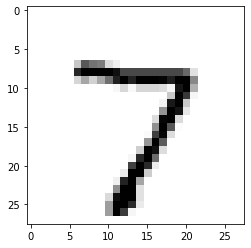

In [26]:
plt.imshow(img, cmap = plt.cm.Greys)

In [27]:
img.shape

(28, 28, 4)

In [28]:
import onnxruntime as ort

In [29]:
sess = ort.InferenceSession('/data/mnist/model.onnx', None)

RuntimeError: [ONNXRuntimeError] : 3 : NO_SUCHFILE : Load model from /data/mnist/model.onnx failed:Load model /data/mnist/model.onnx failed. File doesn't exist

In [30]:
in_name = sess.get_inputs()[0].name

NameError: name 'sess' is not defined

In [ ]:
out_name = sess.get_outputs()[0].name

In [ ]:
# read in test data protobuf files included with the model
import onnx
from onnx import numpy_helper

In [ ]:
tdata_idx = 1

In [ ]:
tensor = onnx.TensorProto()
with open(os.path.join(f'/data/mnist/test_data_set_{tdata_idx}/input_0.pb'), 'rb') as f:
    tensor.ParseFromString(f.read())
input_data = numpy_helper.to_array(tensor)

In [ ]:
input_data.shape

In [ ]:
plt.imshow(input_data[0,0,:,:], cmap = plt.cm.Greys)

In [ ]:
input_data.dtype

In [ ]:
r = sess.run([out_name], {in_name : input_data})

In [ ]:
int(np.argmax(np.array(r[0]).squeeze(), axis=0))

In [ ]:
display_nth_image(7)

In [ ]:
arr = np.array(test_images[7],dtype='float32').reshape(1,1,28,28)

In [ ]:
r = sess.run([out_name], {in_name : arr})

In [ ]:
int(np.argmax(np.array(r[0]).squeeze(), axis=0))

# Reading from a png

If read from a png file, the input matrix looks different, every element has four color channels (RGBA).  Recall `img` is the image written to a file earlier.

In [ ]:
type(img)

In [ ]:
img.shape

In [ ]:
img.dtype

In [ ]:
imgarr = np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype('float32')

In [ ]:
imgarr.shape

In [ ]:
imgarr.dtype

Not convinced that this is the right way to convert images to grayscale, as it looks like the colorspace is flipped:

In [ ]:
plt.imshow(imgarr, cmap = 'Greys')

However, it seems to work:

In [ ]:
r = sess.run([out_name], {in_name : imgarr.reshape(1,1,28,28)})

In [ ]:
int(np.argmax(np.array(r[0]).squeeze(), axis=0))

In [ ]:
print ("Test")